# Celltiment Analysis
------------------------------------------------------------------------------------------------------------------------------------------------------
### AnalySIX - Project Group 6
##### Members: Aditya Bhide, Isha Jain, Issac (Jie) Zhang, Allen (Hao) Yang, Shlok Mehta
------------------------------------------------------------------------------------------------------------------------------------------------------


### Introduction

In today's world, businesses are shifting online, the information availability has increased exponentially. Using this information we can gain some powerful insights by processing, analyzing and visualizing the data available to us. With the developments and innovations in the industry, this vast amount of data is available to us on various devices such as cell phones, tablets, laptops and computers. 

A Cell Phone is one of the most essential things to us now-a-days as we are mostly dependent on it as it keeps us connected to people, helps in getting our tasks done, provides sources of entertainment and so on. Choosing the best Cell Phone is very essential as it is the one thing that people spend most of their time on. 

Amazon is one of the largest and most successful retailers for electronic devices. Most people buy electronic devices such as Cell phones from Amazon. The reviews on Amazon are essential because they help retailers and manufacturers know why a customer dislikes or likes a product, saving them millions of dollars each year from conducting customer surveys. 

In this project, we help customers choose the best Cell Phones by analyzing the reviews posted on `www.amazon.com`.  for different cellphone brands such as `Apple`, `Motorola`, `Samsung`, `Xiaomi`, etc., to gain valuable insights on the different cellphone brands and visualize the data to identify the various patterns and trends in the reviews for each cellphone brand. Furthermore, we perform sentiment analysis on the reviews for each cellphone brand in order to analyze the sentiments of the reviews based on whether the customers like or dislike the cellphones. Based on the sentiment analysis, we analyze the sentiments of the reviews to identify any similarities or differences in the sentiments/opinions of the different users for the different cellphone brands or any particular cellphone model. 

------------------------------------------------------------------------------------------------------------------------------------------------------
### Data Acquisition and Description:
##### Data Acquisition:
- The data was acquired from **Kaggle**
- Link to the dataset: https://www.kaggle.com/grikomsn/amazon-cellphones-reviews

##### Data Description:
- The data consist of two CSV Files `items.csv` and `reviews.csv`
- The items dataset contains 721 Rows and 10 Columns and has a total of 7,206 values in the data set
- The items dataset describes the various brands of cell phones, the product ID, the cell phone model name, the amazon URL for the product, the image URL for the model, the reviewURL, the total number of reviews for each model and the price of the model
- The reviews dataset contains 67,987 rows and 8 columns and a total of 503,113 values in the dataset.
- The reviews dataset describes the reviews for each product ID given in the first dataset, the title and the body for each review, the name of the user who wrote the review, it also identifies if the person is verified or not (TRUE if verified user, FALSE if not a verified user), the rating given by the user and the date on which the review was written.

### Data Processing:

- We start by importing the python libraries that we are going to use for our analysis

In [1]:
# Import the python pandas library
import pandas as pd
import numpy as np
from numpy import nan as NA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
nltk.download('stopwords')
nltk.download('wordnet')
import imageio
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
stopwords = STOPWORDS
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


- Here, we load the two datasets: `items.csv` and `reviews.csv`
- Then, we change the column name `asin` to `product_id` which will be lated used to identify each individual product

In [2]:
# Load the items dataset
items_df = pd.read_csv("items.csv")
items_df.rename(columns = {"asin": "product_id"}, inplace = True)
items_df

product_id     brand                                              title  \
0    B0000SX2UC       NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
1    B0009N5L7K  Motorola                                Motorola I265 phone   
2    B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
3    B001AO4OUC  Motorola              Motorola i335 Cell Phone Boost Mobile   
4    B001DCJAJG  Motorola      Motorola V365 no contract cellular phone AT&T   
..          ...       ...                                                ...   
715  B07ZPKZSSC     Apple  Apple iPhone 11 Pro, 64GB, Fully Unlocked - Sp...   
716  B07ZQSGP53    Xiaomi  Xiaomi Redmi Note 8, 32GB/3GB RAM 6.3" FHD+ Di...   
717  B081H6STQQ      Sony  Sony Xperia 1 Unlocked Smartphone and WH1000XM...   
718  B081TJFVCJ     Apple  Apple iPhone X, 64GB, Gray - Fully Unlocked (R...   
719  B0825BB7SG   Samsung  Straight Talk Samsung Galaxy A10e Smartphone 5...   

                                                   url  \
0    https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
1    https://www.amazon.com/Motorola-i265-I265-phon...   
2    https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
3    https://www.amazon.com/Motorola-i335-Phone-Boo...   
4    https://www.amazon.com/Motorola-V365-contract-...   
..                                                 ...   
715  https://www.amazon.com/Apple-iPhone-64GB-Fully...   
716  https://www.amazon.com/Xiaomi-Display-Snapdrag...   
717  https://www.amazon.com/Sony-Smartphone-WH1000X...   
718  https://www.amazon.com/Apple-iPhone-64GB-Gray-...   
719  https://www.amazon.com/Straight-Samsung-Galaxy...   

                                                 image  rating  \
0    https://m.media-amazon.com/images/I/2143EBQ210...     3.0   
1    https://m.media-amazon.com/images/I/419WBAVDAR...     3.0   
2    https://m.media-amazon.com/images/I/71b+q3ydkI...     2.7   
3    https://m.media-amazon.com/images/I/710UO8gdT+...     3.3   
4    https://m.media-amazon.com/images/I/61LYNCVrrK...     3.1   
..                                                 ...     ...   
715  https://m.media-amazon.com/images/I/41wDuEW9iZ...     1.0   
716  https://m.media-amazon.com/images/I/41foh4FKHE...     4.6   
717  https://m.media-amazon.com/images/I/51zZTAXZTP...     4.5   
718  https://m.media-amazon.com/images/I/71yMgOenT5...     5.0   
719  https://m.media-amazon.com/images/I/81+3SWSAhD...     5.0   

                                             reviewUrl  totalReviews   price  \
0    https://www.amazon.com/product-reviews/B0000SX2UC            14    0.00   
1    https://www.amazon.com/product-reviews/B0009N5L7K             7   49.95   
2    https://www.amazon.com/product-reviews/B000SKTZ0S            22   99.99   
3    https://www.amazon.com/product-reviews/B001AO4OUC            21    0.00   
4    https://www.amazon.com/product-reviews/B001DCJAJG            12  149.99   
..                                                 ...           ...     ...   
715  https://www.amazon.com/product-reviews/B07ZPKZSSC             1  949.00   
716  https://www.amazon.com/product-reviews/B07ZQSGP53             3  150.96   
717  https://www.amazon.com/product-reviews/B081H6STQQ            70  948.00   
718  https://www.amazon.com/product-reviews/B081TJFVCJ             1  478.97   
719  https://www.amazon.com/product-reviews/B0825BB7SG             1  139.00   

     originalPrice  
0             0.00  
1             0.00  
2             0.00  
3             0.00  
4             0.00  
..             ...  
715           0.00  
716           0.00  
717           0.00  
718           0.00  
719         139.26  

[720 rows x 10 columns]

In [3]:
# Load the reviews dataset
reviews_df = pd.read_csv("reviews.csv")
reviews_df.rename(columns = {"asin": "product_id"}, inplace = True)
reviews_df

product_id               name  rating                date  verified  \
0      B0000SX2UC              Janet       3    October 11, 2005     False   
1      B0000SX2UC         Luke Wyatt       1     January 7, 2004     False   
2      B0000SX2UC             Brooke       5   December 30, 2003     False   
3      B0000SX2UC      amy m. teague       3      March 18, 2004     False   
4      B0000SX2UC      tristazbimmer       4     August 28, 2005     False   
...           ...                ...     ...                 ...       ...   
67981  B081H6STQQ              jande       5     August 16, 2019     False   
67982  B081H6STQQ            2cool4u       5  September 14, 2019     False   
67983  B081H6STQQ              simon       5       July 14, 2019     False   
67984  B081TJFVCJ  Tobiasz Jedrysiak       5   December 24, 2019      True   
67985  B0825BB7SG      Owen Gonzalez       5   December 11, 2019     False   

                                                   title  \
0                            Def not best, but not worst   
1                            Text Messaging Doesn't Work   
2                                        Love This Phone   
3                                Love the Phone, BUT...!   
4           Great phone service and options, lousy case!   
...                                                  ...   
67981  Awesome Phone, but finger scanner is a big mis...   
67982                                    Simply Amazing!   
67983  great phon3, but many bugs need to fix. still ...   
67984                                  Phone is like new   
67985                    Outstanding phone for the price   

                                                    body  helpfulVotes  
0      I had the Samsung A600 for awhile which is abs...           1.0  
1      Due to a software issue between Nokia and Spri...          17.0  
2      This is a great, reliable phone. I also purcha...           5.0  
3      I love the phone and all, because I really did...           1.0  
4      The phone has been great for every purpose it ...           1.0  
...                                                  ...           ...  
67981  I love the camera on this phone. The screen is...           1.0  
67982  I've been an Xperia user for several years and...           1.0  
67983                         buy one more for my cousin           NaN  
67984  Product looks and works like new. Very much re...           NaN  
67985  I love the size and style of this phone. It is...           NaN  

[67986 rows x 8 columns]

- For better analysis, working on two different dataframes separately would be considered inefficient, thus, we merge the two dataframes `items.csv` and `review.csv` on the common column in each dataframe which is `product_id` using the `merge()` function
- The name of the new merged dataframe is `project_df`

In [4]:
# Merge the two dataframes
project_df = pd.merge(items_df, reviews_df, how = "right", on = "product_id")
project_df

product_id    brand                                            title_x  \
0      B0000SX2UC      NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
1      B0000SX2UC      NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
2      B0000SX2UC      NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
3      B0000SX2UC      NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
4      B0000SX2UC      NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
...           ...      ...                                                ...   
67981  B081H6STQQ     Sony  Sony Xperia 1 Unlocked Smartphone and WH1000XM...   
67982  B081H6STQQ     Sony  Sony Xperia 1 Unlocked Smartphone and WH1000XM...   
67983  B081H6STQQ     Sony  Sony Xperia 1 Unlocked Smartphone and WH1000XM...   
67984  B081TJFVCJ    Apple  Apple iPhone X, 64GB, Gray - Fully Unlocked (R...   
67985  B0825BB7SG  Samsung  Straight Talk Samsung Galaxy A10e Smartphone 5...   

                                                     url  \
0      https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
1      https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
2      https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
3      https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
4      https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
...                                                  ...   
67981  https://www.amazon.com/Sony-Smartphone-WH1000X...   
67982  https://www.amazon.com/Sony-Smartphone-WH1000X...   
67983  https://www.amazon.com/Sony-Smartphone-WH1000X...   
67984  https://www.amazon.com/Apple-iPhone-64GB-Gray-...   
67985  https://www.amazon.com/Straight-Samsung-Galaxy...   

                                                   image  rating_x  \
0      https://m.media-amazon.com/images/I/2143EBQ210...       3.0   
1      https://m.media-amazon.com/images/I/2143EBQ210...       3.0   
2      https://m.media-amazon.com/images/I/2143EBQ210...       3.0   
3      https://m.media-amazon.com/images/I/2143EBQ210...       3.0   
4      https://m.media-amazon.com/images/I/2143EBQ210...       3.0   
...                                                  ...       ...   
67981  https://m.media-amazon.com/images/I/51zZTAXZTP...       4.5   
67982  https://m.media-amazon.com/images/I/51zZTAXZTP...       4.5   
67983  https://m.media-amazon.com/images/I/51zZTAXZTP...       4.5   
67984  https://m.media-amazon.com/images/I/71yMgOenT5...       5.0   
67985  https://m.media-amazon.com/images/I/81+3SWSAhD...       5.0   

                                               reviewUrl  totalReviews  \
0      https://www.amazon.com/product-reviews/B0000SX2UC            14   
1      https://www.amazon.com/product-reviews/B0000SX2UC            14   
2      https://www.amazon.com/product-reviews/B0000SX2UC            14   
3      https://www.amazon.com/product-reviews/B0000SX2UC            14   
4      https://www.amazon.com/product-reviews/B0000SX2UC            14   
...                                                  ...           ...   
67981  https://www.amazon.com/product-reviews/B081H6STQQ            70   
67982  https://www.amazon.com/product-reviews/B081H6STQQ            70   
67983  https://www.amazon.com/product-reviews/B081H6STQQ            70   
67984  https://www.amazon.com/product-reviews/B081TJFVCJ             1   
67985  https://www.amazon.com/product-reviews/B0825BB7SG             1   

        price  originalPrice               name  rating_y                date  \
0        0.00           0.00              Janet         3    October 11, 2005   
1        0.00           0.00         Luke Wyatt         1     January 7, 2004   
2        0.00           0.00             Brooke         5   December 30, 2003   
3        0.00           0.00      amy m. teague         3      March 18, 2004   
4        0.00           0.00      tristazbimmer         4     August 28, 2005   
...       ...            ...                ...       ...                 ...   
67981  948.00   

- After merging, we can observe that the columns names need to be changed for better understanding of the columns, thus, we change the column names in `project_df` using the pandas `rename()` method

In [5]:
# Rename the Columns
project_df.rename(columns = {"title_x": "product_title","rating_x": "product_rating", "rating_y": "review_rating", "title_y": "review_title"}, inplace = True)
project_df.head()

product_id brand                                      product_title  \
0  B0000SX2UC   NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
1  B0000SX2UC   NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
2  B0000SX2UC   NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
3  B0000SX2UC   NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
4  B0000SX2UC   NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   

                                                 url  \
0  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
1  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
2  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
3  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
4  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   

                                               image  product_rating  \
0  https://m.media-amazon.com/images/I/2143EBQ210...             3.0   
1  https://m.media-amazon.com/images/I/2143EBQ210...             3.0   
2  https://m.media-amazon.com/images/I/2143EBQ210...             3.0   
3  https://m.media-amazon.com/images/I/2143EBQ210...             3.0   
4  https://m.media-amazon.com/images/I/2143EBQ210...             3.0   

                                           reviewUrl  totalReviews  price  \
0  https://www.amazon.com/product-reviews/B0000SX2UC            14    0.0   
1  https://www.amazon.com/product-reviews/B0000SX2UC            14    0.0   
2  https://www.amazon.com/product-reviews/B0000SX2UC            14    0.0   
3  https://www.amazon.com/product-reviews/B0000SX2UC            14    0.0   
4  https://www.amazon.com/product-reviews/B0000SX2UC            14    0.0   

   originalPrice           name  review_rating               date  verified  \
0            0.0          Janet              3   October 11, 2005     False   
1            0.0     Luke Wyatt              1    January 7, 2004     False   
2            0.0         Brooke              5  December 30, 2003     False   
3            0.0  amy m. teague              3     March 18, 2004     False   
4            0.0  tristazbimmer              4    August 28, 2005     False   

                                   review_title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  
0  I had the Samsung A600 for awhile which is abs...           1.0  
1  Due to a software issue between Nokia and Spri...          17.0  
2  This is a great, reliable phone. I also purcha...           5.0  
3  I love the phone and all, because I really did...           1.0  
4  The phone has been great for every purpose it ...           1.0

- Now, we check for any duplicate rows in the `project_df` using the `duplicated()` function

In [6]:
# Check for any duplicate rows in the dataframe
print(f"The total number of duplicated rows in the dataframe: {project_df.duplicated().sum()}")
project_df[project_df.duplicated()]

The total number of duplicated rows in the dataframe: 12


product_id     brand  \
2527   B00836Y6B2     Nokia   
3047   B00836Y6B2     Nokia   
3073   B00836Y6B2     Nokia   
6985   B00E6FGSHY   Samsung   
8378   B00F2SKPIM   Samsung   
14917  B00OZTSY6Y  Motorola   
15628  B00V7FY44A   Samsung   
18163  B014GCG150   Samsung   
27123  B01M0PADR4    Google   
33455  B06XYMCMHD   Samsung   
53176  B07HK4JNV1    Xiaomi   
66713  B07WSJYDXX  Motorola   

                                           product_title  \
2527              Nokia Lumia 900 Black Factory Unlocked   
3047              Nokia Lumia 900 Black Factory Unlocked   
3073              Nokia Lumia 900 Black Factory Unlocked   
6985          Samsung Galaxy S4, White Frost 16GB (AT&T)   
8378   Samsung Galaxy Note 3, Black 32GB (Verizon Wir...   
14917  Motorola DROID Turbo XT1254, Black Ballistic N...   
15628  Samsung Galaxy S6 Edge, White Pearl 32GB (Veri...   
18163  Samsung Galaxy J5 SM-J500H/DS GSM Factory Unlo...   
27123  Google Pixel XL G2PW210032GBBK Factory Unlocke...   
33455  Samsung Galaxy S8 SM-G950F Unlocked 64GB - Int...   
53176  Xiaomi Redmi Note 6 Pro 64GB / 4GB RAM 6.26" D...   
66713  Motorola G6 – 32 GB – Unlocked (AT&T/Sprint/T-...   

                                                     url  \
2527   https://www.amazon.com/Nokia-Lumia-900-Factory...   
3047   https://www.amazon.com/Nokia-Lumia-900-Factory...   
3073   https://www.amazon.com/Nokia-Lumia-900-Factory...   
6985   https://www.amazon.com/Samsung-Galaxy-S4-White...   
8378   https://www.amazon.com/Samsung-Galaxy-Note-Ver...   
14917  https://www.amazon.com/Motorola-DROID-Turbo-Ba...   
15628  https://www.amazon.com/Samsung-Galaxy-S6-Edge-...   
18163  https://www.amazon.com/Samsung-SM-J500H-Unlock...   
27123  https://www.amazon.com/Google-G2PW210032GBBK-U...   
33455  https://www.amazon.com/Samsung-Galaxy-SM-G950F...   
53176  https://www.amazon.com/Xiaomi-Factory-Unlocked...   
66713  https://www.amazon.com/Motorola-G6-Unlocked-T-...   

                                                   image  product_rating  \
2527   https://m.media-amazon.com/images/I/81ZlbLtZ3P...             3.2   
3047   https://m.media-amazon.com/images/I/81ZlbLtZ3P...             3.2   
3073   https://m.media-amazon.com/images/I/81ZlbLtZ3P...             3.2   
6985   https://m.media-amazon.com/images/I/81suaO+v0m...             3.7   
8378   https://m.media-amazon.com/images/I/91eFtaIWpc...             3.9   
14917  https://m.media-amazon.com/images/I/81VMO0Upxf...             3.6   
15628  https://m.media-amazon.com/images/I/814WwhaRVu...             3.5   
18163  https://m.media-amazon.com/images/I/61alJun3Jv...             4.1   
27123  https://m.media-amazon.com/images/I/71PZz7CQ9U...             3.4   
33455  https://m.media-amazon.com/images/I/81FWIR3RbU...             3.9   
53176  https://m.media-amazon.com/images/I/517Q3-wHBk...             4.3   
66713  https://m.media-amazon.com/images/I/51L6DbMbvK...             3.9   

                                               reviewUrl  totalReviews  \
2527   https://www.amazon.com/product-reviews/B00836Y6B2           929   
3047   https://www.amazon.com/product-reviews/B00836Y6B2           929   
3073   https://www.amazon.com/product-reviews/B00836Y6B2           929   
6985   https://www.amazon.com/product-reviews/B00E6FGSHY           641   
8378   https://www.amazon.com/product-reviews/B00F2SKPIM           983   
14917  https://www.amazon.com/product-reviews/B00OZTSY6Y           545   
15628  https://www.amazon.com/product-reviews/B00V7FY44A           505   
18163  https://www.amazon.com/product-reviews/B014GCG150           645   
27123  https://www.amazon.com/product-reviews/B01M0PADR4           429   
33455  https://www.amazon.com/product-reviews/B06XYMCMHD           117   
53176  https://www.amazon.com/product-reviews/B07HK4JNV1           441   
66713  https://www.amazon.com/product-reviews/B07WSJYDXX           836   

        price  originalPrice                    name  review_rating  \
2527   109.98     

- In the output above, we can see that there are a total of 12 duplicate rows in the dataframe.
- We need to delete the duplicate rows in the dataframe, for that, we use the pandas `drop_duplicates()` method

In [7]:
# Drop the duplicate rows
project_df.drop_duplicates(inplace = True)
project_df.head()

product_id brand                                      product_title  \
0  B0000SX2UC   NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
1  B0000SX2UC   NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
2  B0000SX2UC   NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
3  B0000SX2UC   NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
4  B0000SX2UC   NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   

                                                 url  \
0  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
1  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
2  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
3  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
4  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   

                                               image  product_rating  \
0  https://m.media-amazon.com/images/I/2143EBQ210...             3.0   
1  https://m.media-amazon.com/images/I/2143EBQ210...             3.0   
2  https://m.media-amazon.com/images/I/2143EBQ210...             3.0   
3  https://m.media-amazon.com/images/I/2143EBQ210...             3.0   
4  https://m.media-amazon.com/images/I/2143EBQ210...             3.0   

                                           reviewUrl  totalReviews  price  \
0  https://www.amazon.com/product-reviews/B0000SX2UC            14    0.0   
1  https://www.amazon.com/product-reviews/B0000SX2UC            14    0.0   
2  https://www.amazon.com/product-reviews/B0000SX2UC            14    0.0   
3  https://www.amazon.com/product-reviews/B0000SX2UC            14    0.0   
4  https://www.amazon.com/product-reviews/B0000SX2UC            14    0.0   

   originalPrice           name  review_rating               date  verified  \
0            0.0          Janet              3   October 11, 2005     False   
1            0.0     Luke Wyatt              1    January 7, 2004     False   
2            0.0         Brooke              5  December 30, 2003     False   
3            0.0  amy m. teague              3     March 18, 2004     False   
4            0.0  tristazbimmer              4    August 28, 2005     False   

                                   review_title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  
0  I had the Samsung A600 for awhile which is abs...           1.0  
1  Due to a software issue between Nokia and Spri...          17.0  
2  This is a great, reliable phone. I also purcha...           5.0  
3  I love the phone and all, because I really did...           1.0  
4  The phone has been great for every purpose it ...           1.0

- Furthermore, we need to check for any null values in the dataframe columns.

In [8]:
# Check for null values in each column in the dataframe
project_df.isnull().sum()

product_id            0
brand               200
product_title         0
url                   0
image                 0
product_rating        0
reviewUrl             0
totalReviews          0
price                 0
originalPrice         0
name                  2
review_rating         0
date                  0
verified              0
review_title         14
body                 21
helpfulVotes      40763
dtype: int64

- In the output above, we can see the number of null values for each column in the `project_df`
- We observe that the columns `brand`, `name`, `review_title`, `body` and `helpfulVotes` have null values and thus, we need to delete the rows with the null values as these rows will be useless for us in our analysis
- We then need to drop the `helpfulVotes` column because it has a lot of null values and will be useless in our analysis
- Finally, we drop the `originalPrice` column because it contains missing data which is represented as 0.0 which does not add any value to our analysis

In [9]:
# Delete the rows with null values in the columns: 'brand', 'name', 'review_title' and 'body'
project_df.dropna(subset = ['brand', 'name', 'review_title', 'body'], inplace = True)
project_df.drop(columns = ["helpfulVotes", "originalPrice"], axis = 1, inplace = True)
# Reset the index
project_df.reset_index(drop = True, inplace = True)
project_df

product_id     brand  \
0      B0009N5L7K  Motorola   
1      B0009N5L7K  Motorola   
2      B0009N5L7K  Motorola   
3      B0009N5L7K  Motorola   
4      B0009N5L7K  Motorola   
...           ...       ...   
67737  B081H6STQQ      Sony   
67738  B081H6STQQ      Sony   
67739  B081H6STQQ      Sony   
67740  B081TJFVCJ     Apple   
67741  B0825BB7SG   Samsung   

                                           product_title  \
0                                    Motorola I265 phone   
1                                    Motorola I265 phone   
2                                    Motorola I265 phone   
3                                    Motorola I265 phone   
4                                    Motorola I265 phone   
...                                                  ...   
67737  Sony Xperia 1 Unlocked Smartphone and WH1000XM...   
67738  Sony Xperia 1 Unlocked Smartphone and WH1000XM...   
67739  Sony Xperia 1 Unlocked Smartphone and WH1000XM...   
67740  Apple iPhone X, 64GB, Gray - Fully Unlocked (R...   
67741  Straight Talk Samsung Galaxy A10e Smartphone 5...   

                                                     url  \
0      https://www.amazon.com/Motorola-i265-I265-phon...   
1      https://www.amazon.com/Motorola-i265-I265-phon...   
2      https://www.amazon.com/Motorola-i265-I265-phon...   
3      https://www.amazon.com/Motorola-i265-I265-phon...   
4      https://www.amazon.com/Motorola-i265-I265-phon...   
...                                                  ...   
67737  https://www.amazon.com/Sony-Smartphone-WH1000X...   
67738  https://www.amazon.com/Sony-Smartphone-WH1000X...   
67739  https://www.amazon.com/Sony-Smartphone-WH1000X...   
67740  https://www.amazon.com/Apple-iPhone-64GB-Gray-...   
67741  https://www.amazon.com/Straight-Samsung-Galaxy...   

                                                   image  product_rating  \
0      https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
1      https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
2      https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
3      https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
4      https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
...                                                  ...             ...   
67737  https://m.media-amazon.com/images/I/51zZTAXZTP...             4.5   
67738  https://m.media-amazon.com/images/I/51zZTAXZTP...             4.5   
67739  https://m.media-amazon.com/images/I/51zZTAXZTP...             4.5   
67740  https://m.media-amazon.com/images/I/71yMgOenT5...             5.0   
67741  https://m.media-amazon.com/images/I/81+3SWSAhD...             5.0   

                                               reviewUrl  totalReviews  \
0      https://www.amazon.com/product-reviews/B0009N5L7K             7   
1      https://www.amazon.com/product-reviews/B0009N5L7K             7   
2      https://www.amazon.com/product-reviews/B0009N5L7K             7   
3      https://www.amazon.com/product-reviews/B0009N5L7K             7   
4      https://www.amazon.com/product-reviews/B0009N5L7K             7   
...                                                  ...           ...   
67737  https://www.amazon.com/product-reviews/B081H6STQQ            70   
67738  https://www.amazon.com/product-reviews/B081H6STQQ            70   
67739  https://www.amazon.com/product-reviews/B081H6STQQ            70   
67740  https://www.amazon.com/product-reviews/B081TJFVCJ             1   
67741  https://www.amazon.com/product-reviews/B0825BB7SG             1   

        price               name  review_rating                date  verified  \
0       49.95      Marcel Thomas              1       March 5, 2016      True   
1       49.95         William B.              4    February 9, 2006     False   
2       49.95      K. Mcilhargey              5    February 7, 2006     False   
3       49.95     Stephen Cahill              1   December 20, 201

- Then, we convert the `Date` column to a DateTime object in order to extract only the year of the review.

In [10]:
# Convert date column to a DateTime object
project_df["date"] = pd.to_datetime(project_df["date"])
project_df["review_year"] = project_df["date"].apply(lambda date: date.year)
project_df.head()

product_id     brand        product_title  \
0  B0009N5L7K  Motorola  Motorola I265 phone   
1  B0009N5L7K  Motorola  Motorola I265 phone   
2  B0009N5L7K  Motorola  Motorola I265 phone   
3  B0009N5L7K  Motorola  Motorola I265 phone   
4  B0009N5L7K  Motorola  Motorola I265 phone   

                                                 url  \
0  https://www.amazon.com/Motorola-i265-I265-phon...   
1  https://www.amazon.com/Motorola-i265-I265-phon...   
2  https://www.amazon.com/Motorola-i265-I265-phon...   
3  https://www.amazon.com/Motorola-i265-I265-phon...   
4  https://www.amazon.com/Motorola-i265-I265-phon...   

                                               image  product_rating  \
0  https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
1  https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
2  https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
3  https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
4  https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   

                                           reviewUrl  totalReviews  price  \
0  https://www.amazon.com/product-reviews/B0009N5L7K             7  49.95   
1  https://www.amazon.com/product-reviews/B0009N5L7K             7  49.95   
2  https://www.amazon.com/product-reviews/B0009N5L7K             7  49.95   
3  https://www.amazon.com/product-reviews/B0009N5L7K             7  49.95   
4  https://www.amazon.com/product-reviews/B0009N5L7K             7  49.95   

             name  review_rating       date  verified       review_title  \
0   Marcel Thomas              1 2016-03-05      True       Stupid phone   
1      William B.              4 2006-02-09     False   Exellent Service   
2   K. Mcilhargey              5 2006-02-07     False          I love it   
3  Stephen Cahill              1 2016-12-20      True      Phones locked   
4           Mihir              5 2009-12-13      True  Excellent product   

                                                body  review_year  
0                           DON'T BUY OUT OF SERVICE         2016  
1  I have been with nextel for nearly a year now ...         2006  
2  I just got it and have to say its easy to use,...         2006  
3  1 star because the phones locked so I have to ...         2016  
4  The product has been very good. I had used thi...         2009

------------------------------------------------------------------------------------------------------------------------------------------------------
### Data Analysis

- We are done with the Data Processing part, now we begin our analysis:
- The first thing that w e do in our analysis, check the total number of cellphones for each cellphone brand in the dataset.
- For this we use the `groupby()` function

In [11]:
# Determine the number of cellphones for each brand
items_df.groupby(by = "brand")["title"].count()

brand
ASUS          5
Apple        63
Google       38
HUAWEI       32
Motorola    105
Nokia        44
OnePlus      10
Samsung     346
Sony         27
Xiaomi       46
Name: title, dtype: int64

- From the above output, we can observe the total number cellphones for each cellphone brand
- Next, we can determine the average product ratings for each cellphone brand

In [12]:
# Determine the average product ratings for each cellphone brand
items_df.groupby(by = "brand")["rating"].mean().sort_values(ascending = False)

brand
Xiaomi      4.415217
HUAWEI      4.021875
ASUS        3.860000
Sony        3.788889
Apple       3.782540
Google      3.771053
Motorola    3.643810
Samsung     3.632659
OnePlus     3.580000
Nokia       3.386364
Name: rating, dtype: float64

- The above output shows the average product ratings for each cellphone brand in the dataset.
- We can see that surprisingly Xiomi and HUAWEI have an average rating of above 4 while other popular brands such as Apple and Samsung have relatively low average ratings as compared to other brands
- Now, in the dataset `project_df` there are some values in the `Price` column in the dataframe which have the values 0 and 1, but we didn't drop those rows because they contain the reviews which are more important for our analysis.
- Therefore, we created a new dataframe `price_df` which doesn't contain the rows with cell phone prices with 0 and 1
- We then analyze the correlation between the price of the cellphone and the product ratings using a scatterplot with the Plotly Express `px.scatter()` function.

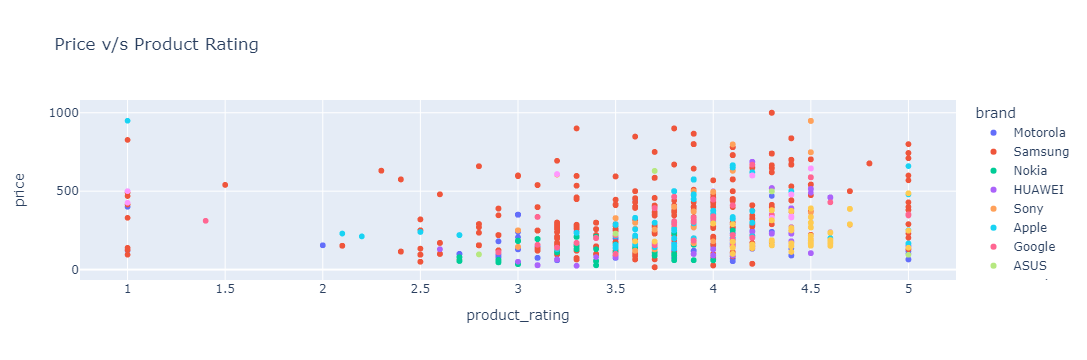

In [13]:
# Create a new price dataframe with correct prices
price_df = project_df[(project_df['price']!=0) & (project_df['price']!=1)]
# Plot the scatterplot for price vs product rating for each cellphone brand
fig = px.scatter(price_df, x="product_rating", y="price",  color='brand', title = "Price v/s Product Rating")
fig.show()

- The plot above is showing us correlation between the Price and the Product Rating. We can observe that for products with lower prices the rating has a wide range from 2-5 but as the price of the product increases the product range keeps decreasing towards the higher rating side.
- Thus, we can infer from this plot that as the product price increases people are more satisfied with their phones and they have lower complaints. Or it may be the case that people buying high priced phones consider it as an investment and research before buying the product as compared to the people who buy low priced phones thus they tend to be more satisfied with their product.
- We can also observe that Samsung has the highest number of ratings and people have only reviewed Samsung and Sony for high priced phones. 
- Also, we can see that for phones under $500 dollars, the lower priced phones, Xiaomi is the best option because most of its reviews have higher rating and for the higher priced phones.

------------------------------------------------------------------------------------------------------------------------------------------------------
- The next thing that we analyze is how the product ratings for each cellphone brand are changing based on years ranging from 2005 to 2019
- We plot the line graphs for product ratings for each cellphone brand using the seaborn `sns.lineplot()` function

In [14]:
# Determine the average product_rating for each brand and every year
data_rating_year=project_df.groupby(['brand', 'review_year'])[['product_rating']].mean().reset_index()
data_rating_year

brand  review_year  product_rating
0     ASUS         2018        3.720468
1     ASUS         2019        3.945000
2    Apple         2015        2.800000
3    Apple         2016        3.180000
4    Apple         2017        3.878531
..     ...          ...             ...
59    Sony         2017        3.655370
60    Sony         2018        3.728286
61    Sony         2019        3.864698
62  Xiaomi         2018        4.248000
63  Xiaomi         2019        4.393216

[64 rows x 3 columns]

<AxesSubplot:title={'center':'Average Product Ratings by Year'}, xlabel='review_year', ylabel='product_rating'>

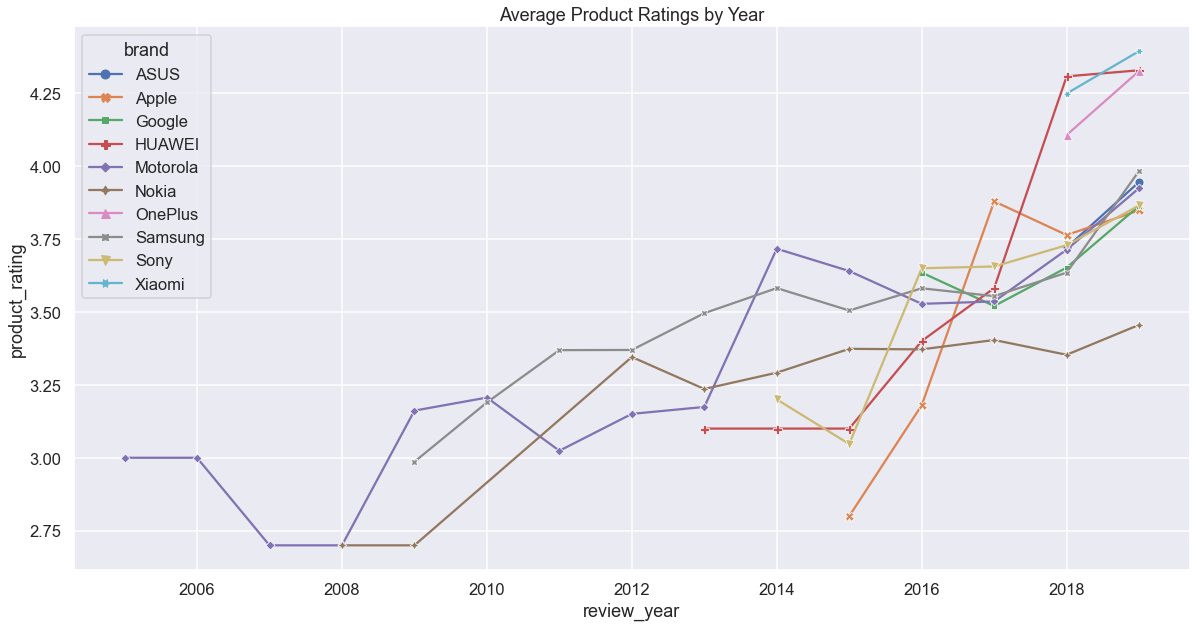

In [15]:
# Plot the line graph for product_rating for each brand accross years
sns.set_style('darkgrid') # Set the grid style
sns.set(rc = {'figure.figsize':(20,10)}) # Set the figure size
sns.set_context('talk') # Set context
ratings_plot=sns.lineplot(data=data_rating_year, x='review_year', y='product_rating', hue='brand', style='brand', markers=True, dashes=False)
ratings_plot.set_title('Average Product Ratings by Year') # Set the title
ratings_plot

- From the above line chart, we can see that overall. There has been an up-raising trend in general for all mobile phone brands since 2005. One probable reason is that most mobile phones have gradually changed into smartphones.
- Since 2017, Xiaomi, OnePlus, Huawei has had the top 3 product ratings, even though they have a short brand history. It seems that Chinese mobile phone manufacturers have put a lot of effort into product optimization. Customers who want to buy a mobile after 2018 could
- It's a bit of a surprise that Apple has an average product rating, which is a little far away from the top 3. Perhaps Apple's products are the most expensive, and people's expectations are a little high. That might contribute to the relatively low product ratings for Apple.
- Since 2015, product ratings for most brands have gone up. But Samsung went through a noticeable decline, which is likely because Samsung confirmed battery faults.

------------------------------------------------------------------------------------------------------------------------------------------------------

### Sentiment Analysis

- Here, we start with the sentiment analysis. For that, we use one of the most well known python libraries `NLTK VADER`
- VADER (Valence Aware Dictionary for Sentiment Reasoning) is a Natural Language Processing (NLP) model used for sentiment analysis of text that is sensitive to both polarity and intensity of emotion
- VADER is a type of sentiment analysis which is based on lexicons of sentiment-related words where each word in the lexicon is classified as positive or negative
- For the sentiment analysis, we analyze the sentiment compound score for each review in the `project_df` for both the columns `review_title` and `body`
- We use the `SentimentIntensityAnalyzer()` function in the NLTK Vader Module and use `apply()` function to calculate the compound of polarity scores for each row review using the `polarity_scores()` function

In [16]:
# Create the Sentiment Score columns for review title and body with the NLTK Vader Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
project_df['Title_Sentiment_Score'] = project_df['review_title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
project_df['Body_Sentiment_Score'] = project_df['body'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
project_df.head(20)

product_id     brand                                      product_title  \
0   B0009N5L7K  Motorola                                Motorola I265 phone   
1   B0009N5L7K  Motorola                                Motorola I265 phone   
2   B0009N5L7K  Motorola                                Motorola I265 phone   
3   B0009N5L7K  Motorola                                Motorola I265 phone   
4   B0009N5L7K  Motorola                                Motorola I265 phone   
5   B0009N5L7K  Motorola                                Motorola I265 phone   
6   B0009N5L7K  Motorola                                Motorola I265 phone   
7   B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
8   B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
9   B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
10  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
11  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
12  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
13  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
14  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
15  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
16  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
17  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
18  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
19  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   

                                                  url  \
0   https://www.amazon.com/Motorola-i265-I265-phon...   
1   https://www.amazon.com/Motorola-i265-I265-phon...   
2   https://www.amazon.com/Motorola-i265-I265-phon...   
3   https://www.amazon.com/Motorola-i265-I265-phon...   
4   https://www.amazon.com/Motorola-i265-I265-phon...   
5   https://www.amazon.com/Motorola-i265-I265-phon...   
6   https://www.amazon.com/Motorola-i265-I265-phon...   
7   https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
8   https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
9   https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
10  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
11  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
12  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
13  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
14  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
15  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
16  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
17  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
18  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
19  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   

                                                image  product_rating  \
0   https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
1   https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
2   https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
3   https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
4   https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
5   https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
6   https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
7   https://m.media-amazon.com/images/I/71b+q3ydkI...             2.7   
8   https://m.media-amazon.com/images/I/71b+q3ydkI...             2.7   
9   https://m.media-amazon.com/images/I/71b+q3ydkI...             2.7   
10  https://m.media-amazon.com/images/I/71b+q3ydkI...             2.7   
11  https://m.media-amazon.com/images/I/71b+q3ydkI...             2.7   
12  https://m.media-amazon.com/images/I/71b+q3ydkI...             2.7   
13  https://m.media-amazon.com/images/I/71b+q3ydkI...             2.7   
14  https://m.media-amazon.com/images/I/71b+q3ydkI.

- The above dataframe shows compound sentiment score for each review in the `project_df` in a new columns `Title_Sentiment_Score` and `Body_Sentiment_Score`
- Following to that, for easier and better analysis, we create a new categorical variable column in the dataframe called `Body_Sentiment_Type`
- The `Body_Sentiment_Type` consists of three categories which classifies the reviews as `Positive`, `Negative` and `Neutral` based on the `Body_Sentiment_Score`
- The review is classified as `Positive` if the sentiment score is greater than or equal to `0.05`, `Neutral` if the sentiment_score is between `0.05` and `-0.05` and `Negative` if the sentiment score is lower than or equal to `-0.05`

In [17]:
# Creating a categorial variable as Positive, Negative or Neutral for reviews
project_df["Body_Sentiment_Type"] = np.where(project_df["Body_Sentiment_Score"] >= 0.05, "Positive", np.where(((project_df["Body_Sentiment_Score"] < 0.05) & (project_df["Body_Sentiment_Score"] > -0.05)), "Neutral", "Negative"))
project_df.head(15)

product_id     brand                                      product_title  \
0   B0009N5L7K  Motorola                                Motorola I265 phone   
1   B0009N5L7K  Motorola                                Motorola I265 phone   
2   B0009N5L7K  Motorola                                Motorola I265 phone   
3   B0009N5L7K  Motorola                                Motorola I265 phone   
4   B0009N5L7K  Motorola                                Motorola I265 phone   
5   B0009N5L7K  Motorola                                Motorola I265 phone   
6   B0009N5L7K  Motorola                                Motorola I265 phone   
7   B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
8   B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
9   B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
10  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
11  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
12  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
13  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
14  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   

                                                  url  \
0   https://www.amazon.com/Motorola-i265-I265-phon...   
1   https://www.amazon.com/Motorola-i265-I265-phon...   
2   https://www.amazon.com/Motorola-i265-I265-phon...   
3   https://www.amazon.com/Motorola-i265-I265-phon...   
4   https://www.amazon.com/Motorola-i265-I265-phon...   
5   https://www.amazon.com/Motorola-i265-I265-phon...   
6   https://www.amazon.com/Motorola-i265-I265-phon...   
7   https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
8   https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
9   https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
10  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
11  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
12  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
13  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
14  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   

                                                image  product_rating  \
0   https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
1   https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
2   https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
3   https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
4   https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
5   https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
6   https://m.media-amazon.com/images/I/419WBAVDAR...             3.0   
7   https://m.media-amazon.com/images/I/71b+q3ydkI...             2.7   
8   https://m.media-amazon.com/images/I/71b+q3ydkI...             2.7   
9   https://m.media-amazon.com/images/I/71b+q3ydkI...             2.7   
10  https://m.media-amazon.com/images/I/71b+q3ydkI...             2.7   
11  https://m.media-amazon.com/images/I/71b+q3ydkI...             2.7   
12  https://m.media-amazon.com/images/I/71b+q3ydkI...             2.7   
13  https://m.media-amazon.com/images/I/71b+q3ydkI...             2.7   
14  https://m.media-amazon.com/images/I/71b+q3ydkI...             2.7   

                                            reviewUrl  totalReviews  price  \
0   https://www.amazon.com/product-reviews/B0009N5L7K             7  49.95   
1   https://www.amazon.com/product-reviews/B0009N5L7K             7  49.95   
2   https://www.amazon.com/product-reviews/B0009N5L7K             7  49.95   
3   https://www.amazon.com/product-reviews/B0009N5L7K             7  49.95   
4   https://www.amazon.com/product-reviews/B0009N5L7K             7  49.95   
5   https://www.amazon.com/product-reviews/B0009N5L7K             7  49.95   
6   https://www.amazon.com/product-reviews/B0009N5L7K             7  49.95   
7   https://www.amazon.com/produc

- Now that we've created the categorical variable column for the Sentiment type, we plot the barchart of the Sentiment Types for each brand in the dataset using the Seaborn `sns.countplot()` function

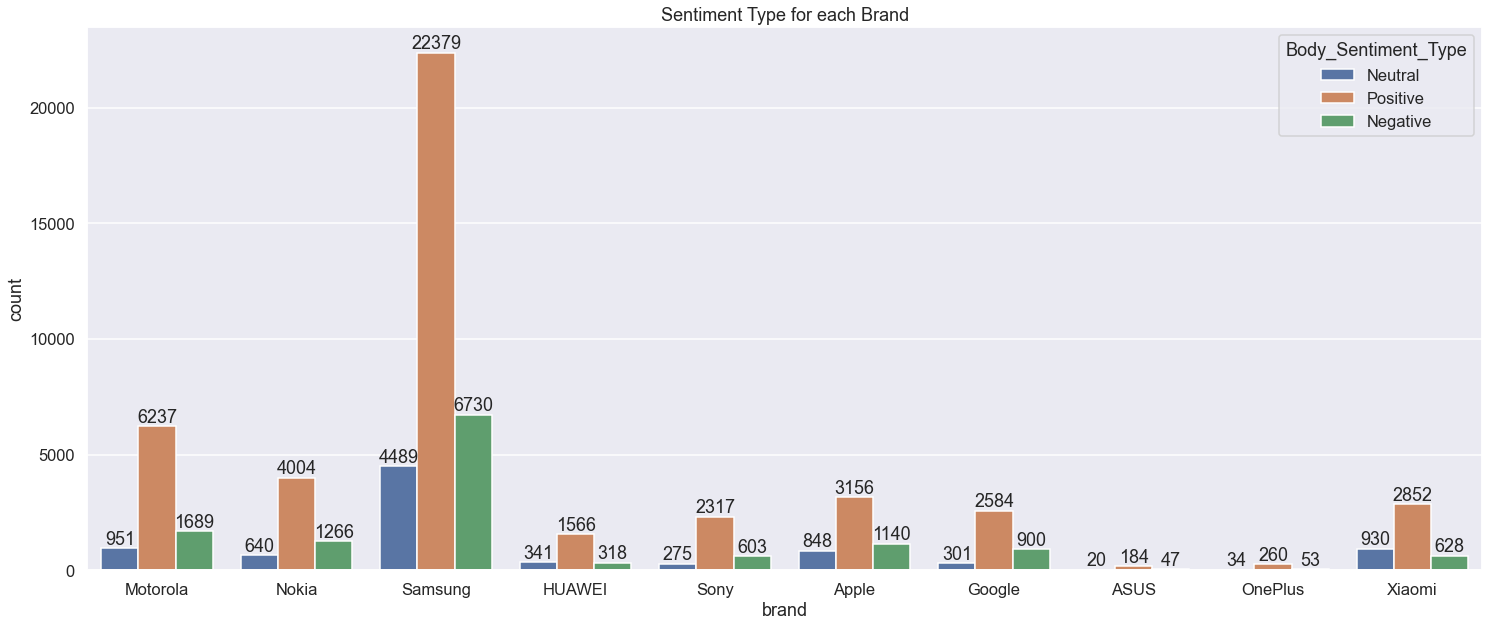

In [18]:
# Plot the Sentiment Types for each brand
plt.figure(figsize = (25,10))
sentiment_plot = sns.countplot(data = project_df, x = "brand", hue = "Body_Sentiment_Type")
plt.title("Sentiment Type for each Brand")
for p in sentiment_plot.patches:
    plt.annotate(f'{p.get_height()}', xy=(p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

- The above graph shows the sentiment type for each cellphone brand in the dataset
- We can see that the number of positive reviews for `Samsung` are very high as compared to any other brands. This is because maybe the people who bought Samsung phones have better features available and in a good price range as compared to the other cellphone brands
- Samsung has the most positive and negative reviews, and this is due to its largest global market share.

------------------------------------------------------------------------------------------------------------------------------------------------------
- Now, We make the word cloud for the words from the positive and negative reviews.
- Word cloud is used to give a visualization for the text data to show the importance of each word by the font size. We use wordcloud library to plot the word cloud chart. 
- We use the default STOPWORDS of WordCloud and set the background picture for the word cloud using the `imageIO` library to read an image mask
- According to the word cloud, we can find out what features of the phones are the customers complimenting or complaining about

In [19]:
# Read the image
mask_image = imageio.imread('mask_oval.jpeg')
# Create a new data frame with only the reviews and the sentiment type for body
text_df = project_df[['body','Body_Sentiment_Type']].copy()
# Convert positive and negative reviews into long strings that can be analyzed
positive_df = text_df[text_df['Body_Sentiment_Type'] == 'Positive']
positive_text_list = positive_df['body'].values.tolist()
positive_text = ''.join(positive_text_list)
negative_df = text_df[text_df['Body_Sentiment_Type'] == 'Negative']
negative_text_list = negative_df['body'].values.tolist()
negative_text = ''.join(negative_text_list)

- Now, we plot the Wordcloud for positive reviews to identify the words that the customers are talking about in their reviews

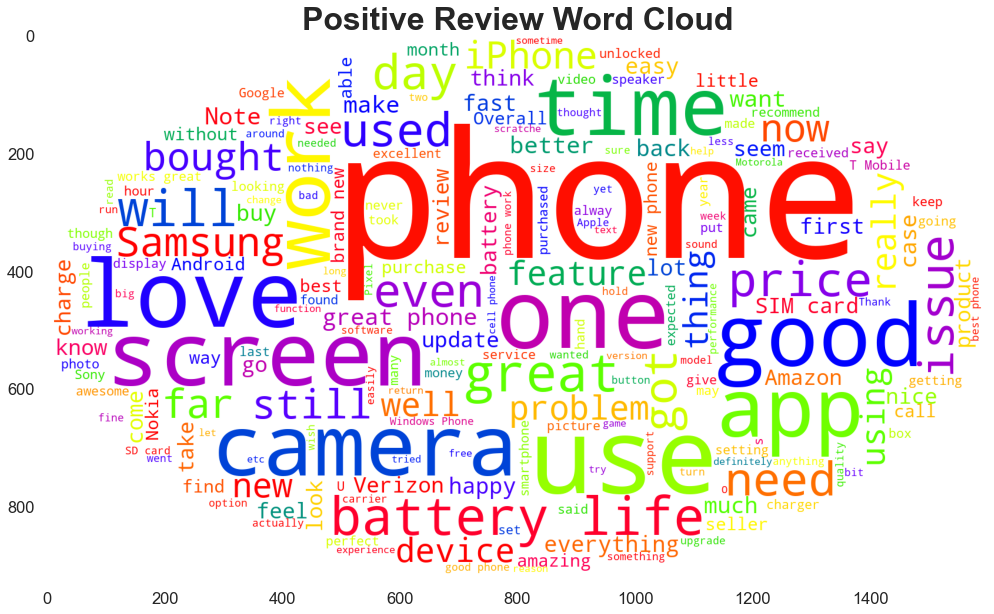

In [20]:
# Plot the postive review wordcloud
positive_wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white', max_font_size=300, stopwords=stopwords)
positive_wordcloud = positive_wordcloud.generate(positive_text)
plt.figure(figsize=(20,10))
plt.title('Positive Review Word Cloud', fontsize = 32, fontweight = 'bold')
plt.grid(False)
plt.imshow(positive_wordcloud)

- From the above wordcloud, we can see that for all the positive reviews in the dataset, some of the words that are prominent are `phone`, `screen`, `battery`, `work`, `great`, `camera`, `app` etc., thus, we can infer that the customers who have written the positive reviews really like their phone and describe the phone as well as the features such as `battery`, `camera` and `screen` to be great for the phones that they purchase
- Now, we plot the Wordcloud for the negative reviews

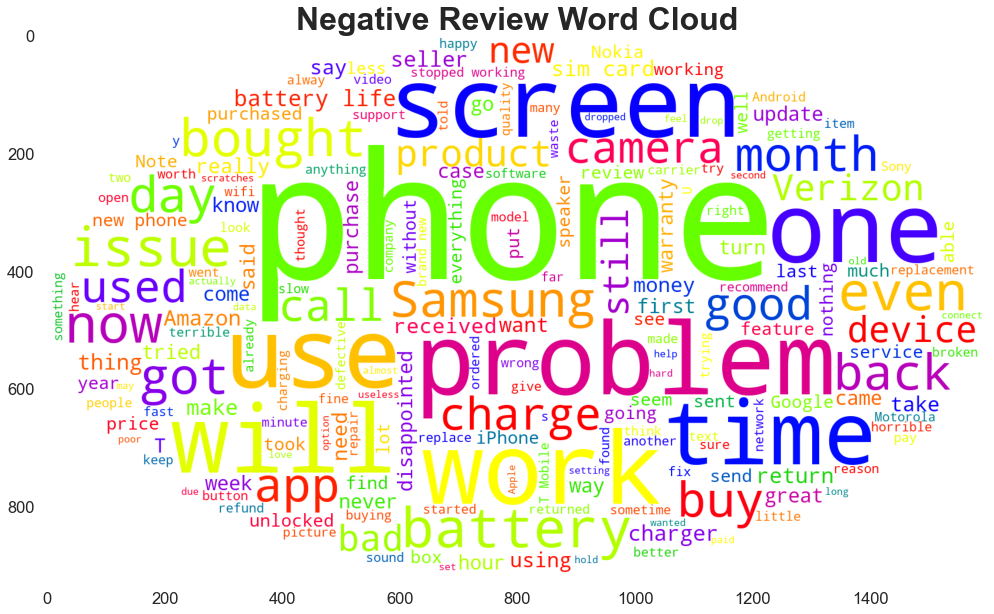

In [21]:
# Plot the negative review wordcloud
negative_wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white', max_font_size = 300, stopwords = stopwords)
negative_wordcloud = negative_wordcloud.generate(negative_text)
plt.figure(figsize=(20,10))
plt.title('Negative Review Word Cloud', fontsize = 32, fontweight = 'bold')
plt.grid(False)
plt.imshow(negative_wordcloud)

- From the above wordcloud, we can see that for all the negative reviews in the dataset, some of the words that are prominent are `phone`, `screen`, `battery`, `time`, `work`, `charge`, etc., thus, we can infer that the customers who have written the negative reviews have issues with the phones that they purchased
- It also can be seen that `Verizon` and `Samsung` are also prominent in the wordcloud, so maybe the customers who purchased the phones with Verizon as the carrier and maybe Verizon services don't work well with Samsung Phones as compared to other brands
------------------------------------------------------------------------------------------------------------------------------------------------------

#### TF-IDF Analysis
- The final analysis that we do is we calculate the TF-IDF (term frequency-inverse document frequency) for the term `Battery` for four brands `Samsung`, `Motorola`, `Apple` and `Xiaomi` because from the above positive and negative reviews wordcloud, the word `Battery` was very prominent and we can determine the significance of that word for the reviewers.
- TF-IDF score represents how much a word is related to a document in a collection of corpus.

In [22]:
# Create a new dataframe with only product title, body and the Sentiment Type
phone_df = project_df[['brand','product_title','body','Body_Sentiment_Type']]
# Convert the positive and negative review text of Apple, Samsung, Motorola, and Xiaomi into seperate lists
apple_positive_list = phone_df[(phone_df['Body_Sentiment_Type']=='Positive') & (phone_df['brand']=='Apple')]['body'].values.tolist()
apple_negative_list = phone_df[(phone_df['Body_Sentiment_Type']=='Negative') & (phone_df['brand']=='Apple')]['body'].values.tolist()

samsung_positive_list = phone_df[(phone_df['Body_Sentiment_Type']=='Positive') & (phone_df['brand']=='Samsung')]['body'].values.tolist()
samsung_negative_list = phone_df[(phone_df['Body_Sentiment_Type']=='Negative') & (phone_df['brand']=='Samsung')]['body'].values.tolist()

motorola_positive_list = phone_df[(phone_df['Body_Sentiment_Type']=='Positive') & (phone_df['brand']=='Motorola')]['body'].values.tolist()
motorola_negative_list = phone_df[(phone_df['Body_Sentiment_Type']=='Negative') & (phone_df['brand']=='Motorola')]['body'].values.tolist()

xiaomi_positive_list = phone_df[(phone_df['Body_Sentiment_Type']=='Positive') & (phone_df['brand']=='Xiaomi')]['body'].values.tolist()
xiaomi_negative_list = phone_df[(phone_df['Body_Sentiment_Type']=='Negative') & (phone_df['brand']=='Xiaomi')]['body'].values.tolist()

- To calculate the TF-IDF Score, we use the `CountVectorizer()` function and `TfidfTransformer()` from the `sklearn` module

In [23]:
# Store the CountVectorizer and the TfidfTransformer in variables
cv = CountVectorizer()
tfidf_transformer = TfidfTransformer()
# Create a list of positive and negative reviews for each of the four brands
positive_data_list = [apple_positive_list, samsung_positive_list, motorola_positive_list, xiaomi_positive_list]
negative_data_list = [apple_negative_list, samsung_negative_list, motorola_negative_list, xiaomi_negative_list]
# Define a list of the 4 brands
brand_list = ['Apple', 'Samsung', 'Motorola', 'Xiaomi']
positive_score = []
negative_score = []
# Calculate the TF-IDF score of the word 'battery' for the positive reviews of each brand
for phone_pos in positive_data_list:
  # Convert the list of positive review text into term-frequency matrix
  phone_data_pos = cv.fit_transform(phone_pos)
  # Convert term-frequency matrix into tf-idf matirx
  tfidf_matrix_pos = tfidf_transformer.fit_transform(phone_data_pos)
  # Create dictionary to find a tfidf word for each word
  word2tfidf = dict(zip(cv.get_feature_names(), tfidf_transformer.idf_))
  for word, score in word2tfidf.items():
    if word in ('battery','Battery'):
      positive_score.append(score)

# Similarly, calculate the TF-IDF score of the word 'battery' for the negative reviews of each brand
for phone_neg in negative_data_list:
  phone_data_neg = cv.fit_transform(phone_neg)
  tfidf_matrix_neg = tfidf_transformer.fit_transform(phone_data_neg)
  word2tfidf = dict(zip(cv.get_feature_names(), tfidf_transformer.idf_))
  for word, score in word2tfidf.items():
    if word in ('battery','Battery'):
      negative_score.append(score)

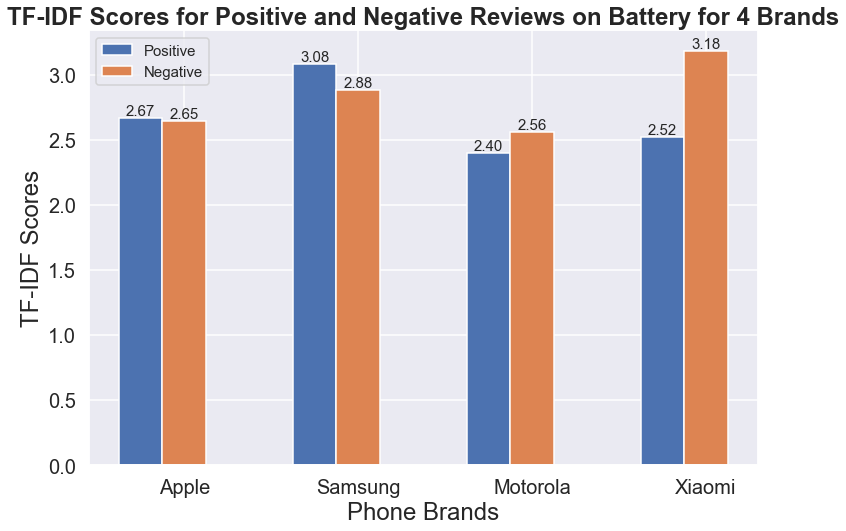

In [24]:
# Make a plot of the TF-IDF value of the word 'battery' in both positive and negative reviews for top 4 brands
brand_name = ['Apple', 'Samsung', 'Motorola', 'Xiaomi']
width = 0.25
x = list(range(len(positive_score)))
plt.figure(figsize=(12,8))
# Create the bars for the TF-IDF scores of positive reviews
positive_plot = plt.bar(x, positive_score, tick_label = brand_name, label = 'Positive', width = width)
for i in range(len(x)):
  x[i] += width
# Create the bars for the TF-IDF scores of negative reviews
negative_plot = plt.bar(x, negative_score, tick_label = brand_name, label = 'Negative', width = width)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel('Phone Brands', fontsize = 24)
plt.ylabel('TF-IDF Scores', fontsize = 24)
plt.title('TF-IDF Scores for Positive and Negative Reviews on Battery for 4 Brands', fontsize = 24, fontweight = 'bold')
# Annotate the value for each bar
for p in positive_plot.patches:
    plt.annotate(f'{p.get_height():.2f}', xy=(p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize = 15)
for p in negative_plot.patches:
    plt.annotate(f'{p.get_height():.2f}', xy=(p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize = 15)    
plt.legend(fontsize = 15)
plt.show()

- TF-IDF score shows how relevant the term 'Battery' is to a customer review in a collection of customer reviews.
- According to the bar chart above, Samsung has a relatively high TF-IDF score for positive reviews comparing with those of other brands. This indicates that Samsung are more likely to receive positive reviews from customers in terms of batteries.
- Similarly, Xiaomi has a relatively high TF-IDF score for negative reviews comparing with those of other brands. This indicates that Xiaomi is more likely to receive negative reviews from customers in terms of batteries.
- Moreover, Xiaomi has an obvious difference in TF-IDF scores for term 'Battery' between positive and negative reviews, while the other three brands don't. This indicates that customers complain more about the battery of Xiaomi than complimenting it, there may be problems like short battery life for Xiaomi.

------------------------------------------------------------------------------------------------------------------------------------------------------
### Conclusions

- For customers who have a budget within US $500, in terms of product ratings and sales performance, Xiaomi is an ideal recommendation for prospective buyers like students. 
- However, Xiaomi users should not set their expectations for battery life too high. 
- Xiaomi should focus on improving battery life to win the market share.
- For customers who want to buy high-end mobile phones, Samsung is the best choice in terms of its largest user base and good battery performance and - its product rating performance among high-end mobile phones. 
- If they have no special preference between Samsung and Apple, Samsung would be a more relatively secure option.
- Battery life is a highly critical factor for prospective buyers. Based on the Word Clouds results, we could see lots of reviews mentioned about battery and battery life. Manufactures with more advanced battery technology are likely to win the competition.